In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sklearn
import sklearn.discriminant_analysis
import pandas as pd
from sklearn.metrics import accuracy_score,confusion_matrix

# Data Exploration

In [2]:
dataset = pd.read_csv("one.csv")

In [7]:
trial = dataset

In [4]:
dataset.head(2)

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable

## Explanation of Data

tau[x]: reaction time of participant (real from the range [0.5,10]s). Tau1 - the value for electricity producer.

p[x]: nominal power consumed(negative)/produced(positive)(real). For consumers from the range [-0.5,-2]s^-2; p1 = abs(p2 + p3 + p4)

g[x]: coefficient (gamma) proportional to price elasticity (real from the range [0.05,1]s^-1). g1 - the value for electricity producer.

stab: the maximal real part of the characteristic equation root (if positive - the system is linearly unstable)(real)

stabf: the stability label of the system (categorical: stable/unstable) (stable = 1/ Unstable = 0)

In [5]:
def replace_boolean(dataset):
    for stab in dataset:
        dataset[stab].replace('stable', 1, inplace=True)
        dataset[stab].replace('unstable', 0, inplace=True)

replace_boolean(dataset)

In [12]:
print(dataset.describe())

               tau1          tau2          tau3          tau4            p1  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       5.250000      5.250001      5.250004      5.249997      3.750000   
std        2.742548      2.742549      2.742549      2.742556      0.752160   
min        0.500793      0.500141      0.500788      0.500473      1.582590   
25%        2.874892      2.875140      2.875522      2.874950      3.218300   
50%        5.250004      5.249981      5.249979      5.249734      3.751025   
75%        7.624690      7.624893      7.624948      7.624838      4.282420   
max        9.999469      9.999837      9.999450      9.999443      5.864418   

                 p2            p3            p4            g1            g2  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -1.250000     -1.250000     -1.250000      0.525000      0.525000   
std        0.433035      0.433035      0.433035    

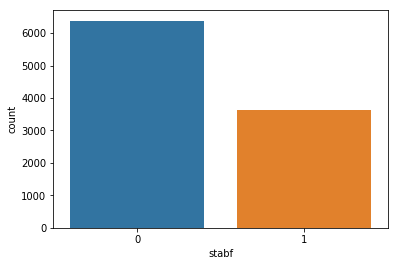

In [28]:
sns.countplot(x = 'stabf',data=dataset)

## We can see that there is a greater number of Unstable grids

In [6]:
trial.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab', 'stabf'],
      dtype='object')

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


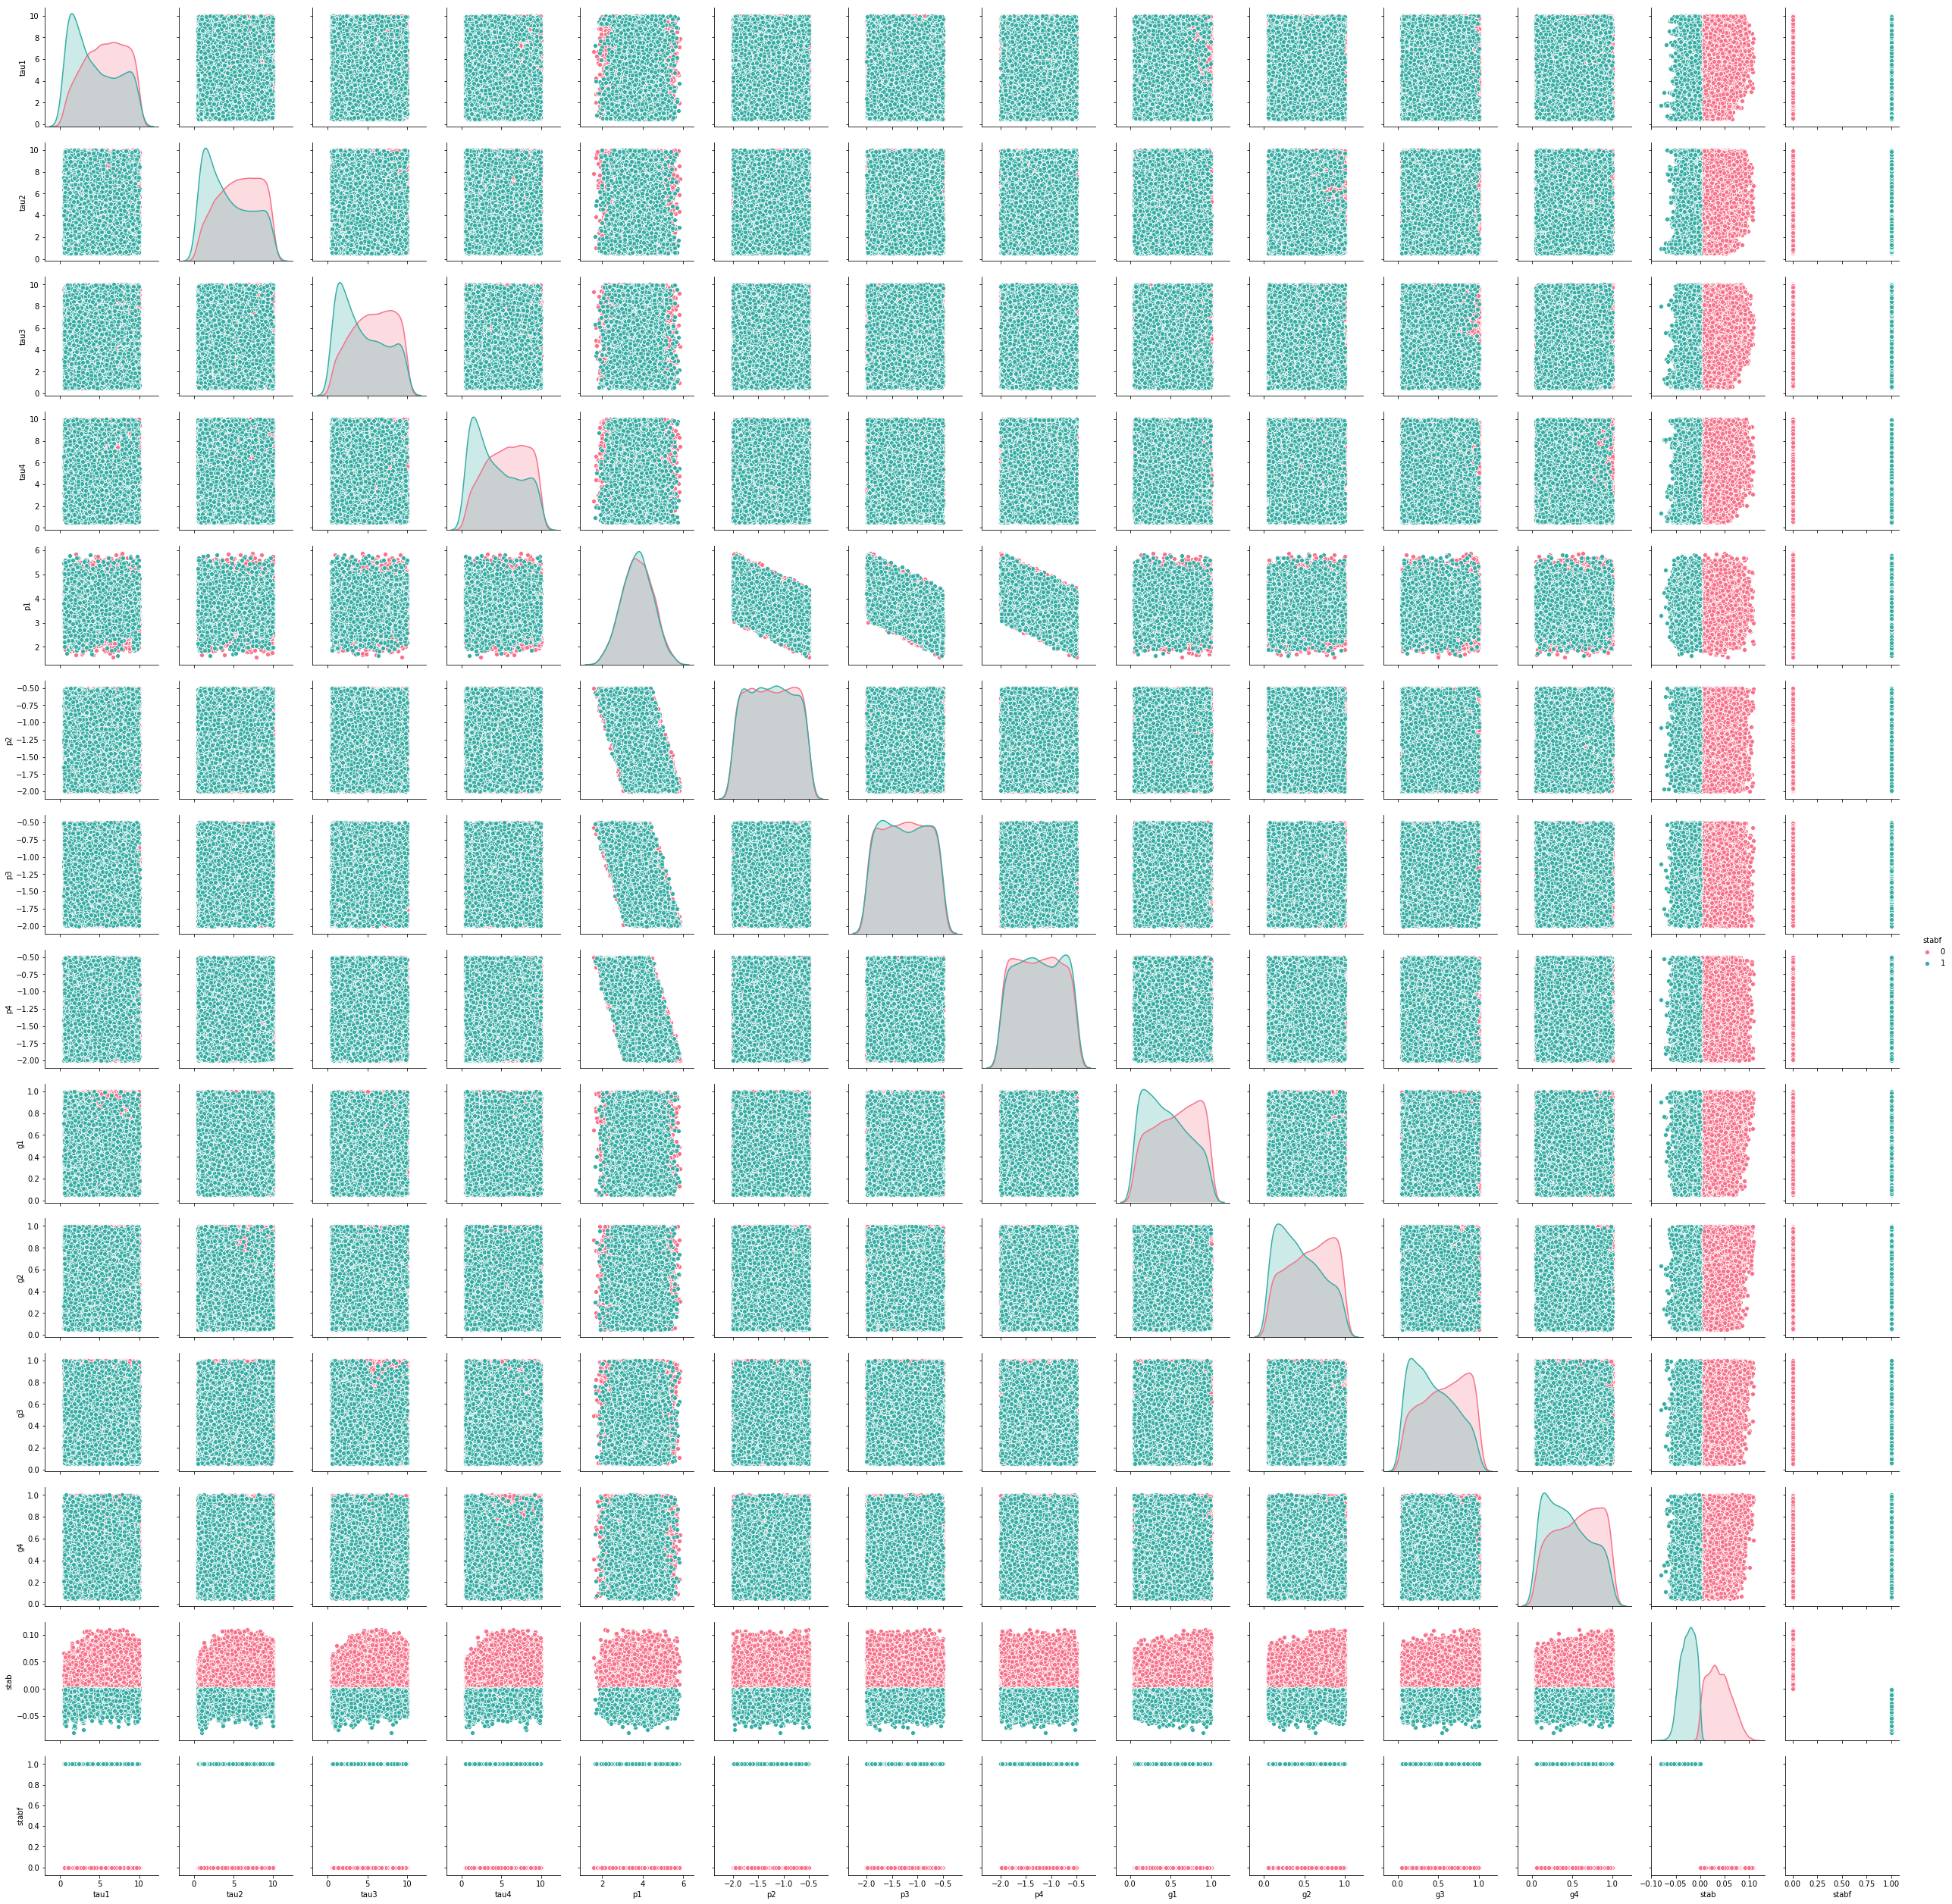

In [29]:
sns.pairplot(dataset, hue="stabf", palette="husl")

##  Identifying co-linearirty of Data

In [30]:
dataset.corr(method='spearman').style.background_gradient(cmap='coolwarm')

In [8]:
y = trial['stabf']

In [9]:
trial.drop('stabf', axis = 1)

tau1      tau2      tau3      tau4        p1        p2        p3  \
0     2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1     9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2     8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3     0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4     3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
5     6.999209  9.109247  3.784066  4.267788  4.429669 -1.857139 -0.670397   
6     6.710166  3.765204  6.929314  8.818562  2.397419 -0.614590 -1.208826   
7     6.953512  1.379125  5.719400  7.870307  3.224495 -0.748998 -1.186517   
8     4.689852  4.007747  1.478573  3.733787  4.041300 -1.410344 -1.238204   
9     9.841496  1.413822  9.769856  7.641616  4.727595 -1.991363 -0.857637   
10    5.930110  6.730873  6.245138  0.533288  2.327092 -0.702501 -1.116920   
11    5.381299  8.014521  8.095174  6.769248  5.507551 -1.972714 -1.849333   
12    1.616787  2.939228  0.819791  4.191804  3.752282 -1.484885 -1.280581   
13    8.551598  8.314952  2.549964  9.926807  4.891714 -1.808626 -1.167061   
14    1.132108  2.920324  8.951079  7.248583  5.033681 -1.846080 -1.362777   
15    7.021362  4.374294  4.775904  8.838426  3.335857 -0.962392 -1.407627   
16    4.952241  8.088672  8.883319  5.694557  5.067296 -1.681414 -1.877061   
17    4.142830  2.439089  1.290456  9.456443  3.934796 -1.469299 -1.766941   
18    9.346126  7.920030  2.335276  3.269181  4.581174 -1.106753 -1.747078   
19    3.931954  9.180890  6.064480  6.292147  5.363996 -1.695085 -1.880273   
20    8.676895  5.583325  4.925402  7.356212  2.828247 -1.396732 -0.929290   
21    7.383177  5.253173  0.924517  0.744899  3.976105 -1.429219 -1.424951   
22    4.541829  1.969862  8.513193  7.562036  4.362835 -1.626414 -1.761731   
23    5.973186  6.043118  5.996045  1.076940  3.828218 -0.989549 -1.079026   
24    7.253346  7.733517  1.621091  7.890610  3.567240 -1.377855 -1.449532   
25    6.192481  2.533877  1.662380  5.163924  3.462392 -1.355954 -1.432846   
26    5.895693  1.096302  1.311732  8.777868  4.069170 -1.063139 -1.374427   
27    0.727077  6.425554  6.269094  0.786911  2.913179 -1.187866 -0.687735   
28    1.807819  7.020356  6.676929  5.169648  3.672288 -1.188471 -0.819164   
29    9.034147  1.071635  5.478342  9.412525  3.405139 -1.163253 -1.653954   
...        ...       ...       ...       ...       ...       ...       ...   
9970  5.137851  0.737253  5.725703  9.068354  3.499583 -1.186086 -1.326108   
9971  0.619440  4.882592  3.360420  4.208011  3.981196 -1.438492 -1.837809   
9972  9.694989  8.393842  4.536673  5.012365  3.988816 -0.837072 -1.525764   
9973  5.485364  3.096149  8.925530  2.090592  4.365430 -1.888132 -1.574179   
9974  0.960580  3.984473  6.134353  9.755264  4.076419 -1.425252 -1.523594   
9975  7.078400  4.660627  3.535984  2.153805  3.055565 -0.988581 -0.899321   
9976  7.063097  3.897790  3.667961  7.953410  4.632592 -1.146609 -1.850362   
9977  3.749501  3.613827  1.868883  2.435817  2.410419 -0.605413 -0.837323   
9978  8.632397  4.239094  1.240248  9.246927  4.092402 -0.868173 -1.439817   
9979  7.512814  9.616251  8.045889  2.200809  2.377325 -0.688485 -0.703106   
9980  4.141337  1.112868  8.400888  1.869624  3.671563 -0.699052 -1.513896   
9981  5.984990  7.833828  4.670350  8.941526  3.562268 -1.505071 -0.891233   
9982  6.756528  7.107648  6.038633  8.236088  1.980384 -0.799625 -0.642624   
9983  1.482214  3.121273  5.220920  1.609288  4.394557 -1.924542 -0.881996   
9984  2.501787  3.087194  7.493896  2.177944  3.817471 -0.958986 -1.044281   
9985  1.976306  6.894304  9.347806  5.763746  3.403860 -1.880294 -0.589551   
9986  6.038326  5.621908  5.099137  2.279340  3.013139 -1.347185 -0.585465   
9987  3.176332  5.101491  8.134258  4.985496  3.031084 -0.957564 -1.102893   
9988  3.871136  7.371163  2.579495  1.540674  3.492453 -0.635868 -1.256279   
9989  9.929407  0.863541  8.1611

# KNN With cross validation, timing and decision of best parameters

k=2 88.44 (+/- 0.14)
k=3 91.28 (+/- 0.33)
k=4 89.37 (+/- 0.36)
k=5 90.87 (+/- 0.33)
k=6 89.24 (+/- 0.20)
k=7 90.29 (+/- 0.33)
k=8 89.33 (+/- 0.29)
k=9 90.15 (+/- 0.16)
k=10 89.04 (+/- 0.09)
k=11 89.56 (+/- 0.16)
k=12 88.77 (+/- 0.24)
k=13 89.19 (+/- 0.07)
k=14 88.51 (+/- 0.12)
k=15 88.69 (+/- 0.07)
k=16 88.11 (+/- 0.32)
k=17 88.59 (+/- 0.13)
k=18 88.01 (+/- 0.16)
k=19 88.33 (+/- 0.20)
k=20 87.77 (+/- 0.30)
The optimal number of neighbors is 2 with 89.4%


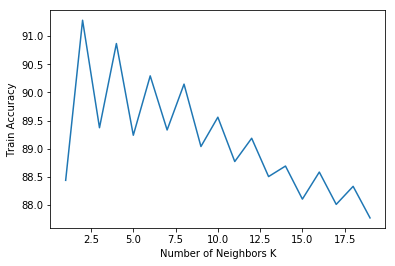

The Time taken to run this was: 9.280441712000027 s


In [11]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from timeit import default_timer as timer

start = timer()

X_trainK, X_testK, y_trainK, y_testK = train_test_split(trial, y, test_size = 0.25, random_state = 42)

#Neighbors
neighbors = np.arange(1,20)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=3, random_state=42)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

end = timer()
print("The Time taken to run this was:", end - start,"s") # Time in seconds

# Confusion Matrix with KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

neighbors = np.arange(0,20)

for i in neighbors:
    i = i + 1
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_trainK, y_trainK)
    knnpred = knn.predict(X_testK)

    print(i)
    print(confusion_matrix(y_testK, knnpred))
    print(round(accuracy_score(y_testK, knnpred),2)*100)
    KNNCV = (cross_val_score(knn, X_trainK, y_trainK, cv=3, n_jobs=1, scoring = 'accuracy').mean())
    print("")
    

1
[[1550   80]
 [  86  784]]
93.0

2
[[1611   19]
 [ 172  698]]
92.0

3
[[1569   61]
 [  91  779]]
94.0

4
[[1601   29]
 [ 154  716]]
93.0

5
[[1569   61]
 [ 100  770]]
94.0

6
[[1592   38]
 [ 159  711]]
92.0

7
[[1565   65]
 [ 114  756]]
93.0

8
[[1587   43]
 [ 154  716]]
92.0

9
[[1558   72]
 [ 126  744]]
92.0

10
[[1579   51]
 [ 160  710]]
92.0

11
[[1557   73]
 [ 140  730]]
91.0

12
[[1574   56]
 [ 167  703]]
91.0

13
[[1552   78]
 [ 139  731]]
91.0

14
[[1568   62]
 [ 169  701]]
91.0

15
[[1548   82]
 [ 150  720]]
91.0

16
[[1567   63]
 [ 175  695]]
90.0

17
[[1551   79]
 [ 149  721]]
91.0

18
[[1571   59]
 [ 176  694]]
91.0

19
[[1549   81]
 [ 158  712]]
90.0

20
[[1567   63]
 [ 176  694]]
90.0



# AdaBoost

In [50]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [38]:
classifier = AdaBoostClassifier(
DecisionTreeClassifier(max_depth=1),
n_estimators= 100
)
classifier.fit(X_trainK, y_trainK)

predictions = classifier.predict(X_testK)

confusion_matrix(y_testK, predictions)

array([[1629,    1],
       [   0,  870]])

# SVC

In [24]:
y = trial['stabf']
X = trial.drop(columns = ['stabf'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [49]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=420, gamma=.05, C=0.50)
svm.fit(X_train, y_train)

print('The accuracy of the svm classifier on training data is {:.2f} out of 1'.format(svm.score(X_train, y_train)))

print('The accuracy of the svm classifier on test data is {:.2f} out of 1'.format(svm.score(X_test, y_test)))

The accuracy of the svm classifier on training data is 0.90 out of 1
The accuracy of the svm classifier on test data is 0.88 out of 1


In [51]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [52]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [53]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [64]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC(probability=True, kernel='linear')
abc =AdaBoostClassifier(n_estimators=5, base_estimator=svc,learning_rate=1)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8292


In [67]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

1.0

In [76]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

In [78]:
import matplotlib as mpl
import matplotlib.pyplot as plt

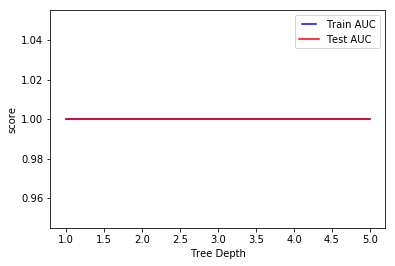

In [87]:
max_depths = np.linspace(1, 5, 5, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train, y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b',label = "Train AUC")
line2, = plt.plot(max_depths, test_results,'r',label = "Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('score')
plt.xlabel('Tree Depth')
plt.show()

In [94]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [95]:
rf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [96]:
y_pred = rf.predict(X_test)

In [97]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

In [99]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

In [100]:
model.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [101]:
y_pred = model.predict(X_test)

In [102]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

In [103]:
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

In [104]:
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingClassifier(learning_rate=eta)
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    y_pred = model.predict(X_test)


    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

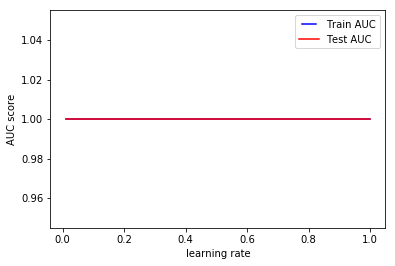

In [105]:

line1, = plt.plot(learning_rates, train_results, 'b', label="Train AUC")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()